In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [90]:
# points per attempt given probability of a make of p
def made_basket(points, p):
    return points if random.random() <= p else 0

In [91]:
# list containing points made in a game
def game(attempts, points, p):
    
    made_baskets = [made_basket(points, p) for a in xrange(attempts)]
    
    return made_baskets

In [92]:
# list containint total points for all games in a season
def season(games, attempts, points, p):
    
    season_outcome = [sum(game(attempts, points, p)) for g in xrange(games)]
    
    return season_outcome

(array([ 0.00543478,  0.00543478,  0.01086957,  0.01992754,  0.0307971 ,
         0.01811594,  0.03442029,  0.01086957,  0.00724638,  0.00181159]),
 array([  54. ,   60.9,   67.8,   74.7,   81.6,   88.5,   95.4,  102.3,
         109.2,  116.1,  123. ]),
 <a list of 10 Patch objects>)

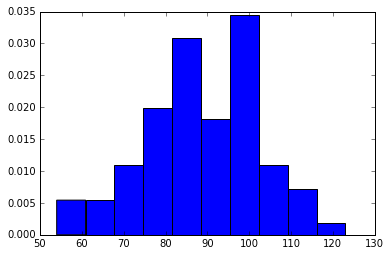

In [93]:
%matplotlib inline
season_3pt = season(games=80, attempts=100, points=3, p=.3)
plt.hist(season_3pt, normed=True, bins=10)

In [94]:
sim_3pt_season = [season(games=80, attempts=100, points=3, p=.30) for x in xrange(100) ]
mean_sim_3pt_season = [round(np.mean(x),2) for x in sim_3pt_season]
std_sim_3pt_season = [round(np.std(x),2) for x in sim_3pt_season]
print mean_sim_3pt_season
print std_sim_3pt_season

[91.01, 89.21, 88.8, 90.86, 91.76, 90.79, 89.21, 88.88, 90.26, 88.95, 89.81, 88.72, 86.7, 91.69, 91.84, 87.9, 90.34, 87.9, 88.99, 90.71, 92.21, 90.97, 92.21, 90.97, 92.29, 87.34, 92.25, 88.54, 90.04, 88.13, 88.01, 88.35, 89.7, 88.58, 90.9, 88.88, 90.41, 90.83, 90.75, 87.97, 89.47, 89.14, 88.05, 91.58, 91.09, 90.19, 90.19, 88.69, 88.09, 90.0, 89.25, 90.26, 90.94, 88.95, 88.58, 92.44, 87.86, 87.45, 87.56, 90.6, 90.15, 90.34, 93.0, 87.34, 92.44, 90.45, 91.5, 87.83, 87.75, 90.3, 88.99, 90.9, 85.72, 89.78, 89.33, 90.94, 92.21, 91.72, 88.35, 90.19, 90.79, 90.56, 91.2, 91.95, 89.4, 91.35, 88.61, 90.94, 87.38, 88.91, 88.5, 91.58, 88.88, 92.55, 91.84, 89.63, 91.24, 90.11, 89.14, 90.79]
[13.8, 12.28, 14.12, 14.47, 12.98, 13.55, 14.53, 13.37, 15.86, 14.33, 12.46, 12.94, 14.16, 14.97, 15.37, 11.59, 14.0, 12.31, 13.61, 13.07, 14.28, 13.74, 12.2, 13.13, 14.58, 13.47, 13.44, 14.6, 12.86, 15.14, 12.97, 14.07, 13.63, 13.56, 13.57, 13.18, 11.88, 14.43, 13.3, 13.23, 14.76, 13.81, 12.6, 13.06, 14.68, 12.0

In [95]:
sim_2pt_season = [season(games=80, attempts=100, points=2, p=.5) for x in xrange(100)]
mean_sim_2pt_season = [round(np.mean(x),2) for x in sim_2pt_season]
std_sim_2pt_season = [round(np.std(x),2) for x in sim_2pt_season]
print mean_sim_2pt_season
print std_sim_2pt_season

[102.8, 99.22, 100.55, 100.53, 99.85, 99.88, 100.47, 101.08, 99.75, 99.55, 100.28, 100.42, 99.03, 99.6, 100.67, 98.28, 100.13, 100.72, 98.22, 100.1, 100.03, 100.6, 99.45, 101.2, 101.22, 98.78, 99.88, 101.13, 99.13, 97.38, 98.15, 99.58, 99.3, 101.25, 101.67, 100.55, 101.13, 98.22, 99.78, 100.15, 98.38, 100.95, 100.0, 98.78, 99.6, 101.1, 98.88, 97.67, 98.83, 99.08, 99.9, 99.2, 98.55, 100.05, 101.65, 98.15, 100.67, 99.55, 100.5, 98.47, 100.72, 100.6, 100.03, 100.0, 100.08, 103.28, 98.0, 99.08, 98.05, 99.5, 100.38, 100.2, 99.47, 100.13, 99.47, 100.58, 99.55, 98.92, 101.22, 98.03, 99.38, 98.3, 99.97, 101.85, 100.13, 97.55, 100.4, 102.5, 100.75, 100.0, 99.05, 99.38, 101.05, 98.75, 101.17, 100.1, 100.83, 100.4, 100.6, 101.4]
[9.48, 9.11, 9.31, 10.42, 10.93, 9.77, 11.37, 10.73, 9.98, 11.05, 10.21, 10.11, 11.08, 9.98, 10.37, 10.51, 10.49, 9.86, 8.52, 9.88, 11.39, 9.57, 9.48, 11.0, 11.14, 10.06, 9.41, 10.03, 10.01, 9.92, 11.33, 9.58, 9.68, 9.88, 10.36, 11.59, 9.93, 9.78, 9.86, 11.47, 9.86, 10.89

10.573522355393211

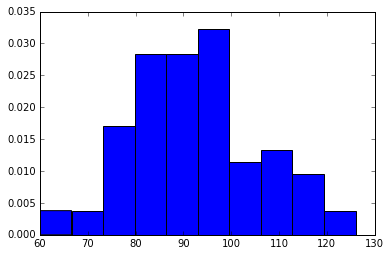

In [89]:
season_2pt = season(games=80, attempts=100, points=2, p=.5)
plt.hist(season_3pt, normed=True, bins=10)
np.std(season_2pt)

In [25]:
def season_sim():

SyntaxError: unexpected EOF while parsing (<ipython-input-25-11abc1f8faf3>, line 1)

In [26]:
[1 for x in xrange(10)]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]